### Assignment 1 - Implement K-Nearest Neighbour (KNN) and Decision Trees (DTs)

Group 55: Rebecca Mizrahi (260975001), Samantha Handal (260983914), Amélie Barsoum (260988658)

### **Task 1: Acquire, preprocess, and analyze the data**


#### Requirements

In [1]:
!pip install pandas
!pip install ucimlrepo

import pandas as pd

#### 1.1 Import Dataset 1: NHANES_age_prediction.csv (National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset)

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887)

# data (as pandas dataframes)
X = pd.DataFrame(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.features)
y = pd.DataFrame(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.targets)

# Concatenate X and y for easier analysis
nhanes_df = pd.concat([X, y], axis=1)

nhanes_df

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,Adult
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...
2273,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
2274,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
2275,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
2276,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


In [3]:
# Provides essential info about the dataset
nhanes_df.info()
print()
print("Shape:" + str(nhanes_df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RIAGENDR   2278 non-null   float64
 1   PAQ605     2278 non-null   float64
 2   BMXBMI     2278 non-null   float64
 3   LBXGLU     2278 non-null   float64
 4   DIQ010     2278 non-null   float64
 5   LBXGLT     2278 non-null   float64
 6   LBXIN      2278 non-null   float64
 7   age_group  2278 non-null   object 
dtypes: float64(7), object(1)
memory usage: 142.5+ KB

Shape:(2278, 8)


In [4]:
# Check for missing values
missing_values = X.isnull().sum()

# If there are missing values, drop those rows
if missing_values.any():
    X = X.dropna()
    print(X.index + " dropped")
    y = y.loc[X.index]  # Update y accordingly if rows are dropped from X

    print("New shape:" + str(nhanes_df.shape))
print(nhanes_df)

      RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN age_group
0          2.0     2.0    35.7   110.0     2.0   150.0  14.91     Adult
1          2.0     2.0    20.3    89.0     2.0    80.0   3.85     Adult
2          1.0     2.0    23.2    89.0     2.0    68.0   6.14     Adult
3          1.0     2.0    28.9   104.0     2.0    84.0  16.15     Adult
4          2.0     1.0    35.9   103.0     2.0    81.0  10.92     Adult
...        ...     ...     ...     ...     ...     ...    ...       ...
2273       2.0     2.0    33.5   100.0     2.0    73.0   6.53     Adult
2274       1.0     2.0    30.0    93.0     2.0   208.0  13.02     Adult
2275       1.0     2.0    23.7   103.0     2.0   124.0  21.41     Adult
2276       2.0     2.0    27.4    90.0     2.0   108.0   4.99     Adult
2277       1.0     2.0    24.5   108.0     2.0   108.0   3.76     Adult

[2278 rows x 8 columns]


In [5]:
"""
Convert target to 1s and 0s -> Change "Adult" to 1, "Senior" to 0
"""
# Convert 'age_group' to numerical values
nhanes_df['age_group'] = nhanes_df['age_group'].map({'Adult': 1, 'Senior': 0})

# Print the updated DataFrame
print(nhanes_df)

      RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN  age_group
0          2.0     2.0    35.7   110.0     2.0   150.0  14.91          1
1          2.0     2.0    20.3    89.0     2.0    80.0   3.85          1
2          1.0     2.0    23.2    89.0     2.0    68.0   6.14          1
3          1.0     2.0    28.9   104.0     2.0    84.0  16.15          1
4          2.0     1.0    35.9   103.0     2.0    81.0  10.92          1
...        ...     ...     ...     ...     ...     ...    ...        ...
2273       2.0     2.0    33.5   100.0     2.0    73.0   6.53          1
2274       1.0     2.0    30.0    93.0     2.0   208.0  13.02          1
2275       1.0     2.0    23.7   103.0     2.0   124.0  21.41          1
2276       2.0     2.0    27.4    90.0     2.0   108.0   4.99          1
2277       1.0     2.0    24.5   108.0     2.0   108.0   3.76          1

[2278 rows x 8 columns]


#### 1.2 Import Dataset 2: Breast Cancer Wisconsin (Original)

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = pd.DataFrame(breast_cancer_wisconsin_original.data.features)
y = pd.DataFrame(breast_cancer_wisconsin_original.data.targets)

# Concatenate X and y for easier analysis
breast_cancer_df = pd.concat([X, y], axis=1)

breast_cancer_df

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [7]:
# Provides essential info about the dataset
breast_cancer_df.info()
print()
print("Shape:")
breast_cancer_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB

Shape:


(699, 10)

In [8]:
# Check for missing values
missing_values = X.isnull().sum()

# If there are missing values, drop those rows
if missing_values.any():
  X = X.dropna()
  print(str(X.index) + " dropped")
  y = y.loc[X.index]  # Update y accordingly if rows are dropped from X

  print("New shape:" + str(breast_cancer_df.shape))


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            689, 690, 691, 692, 693, 694, 695, 696, 697, 698],
           dtype='int64', length=683) dropped
New shape:(699, 10)


#### 1.3 Gather information on datasets

In [9]:
import pandas as pd
#print(nhanes_df.columns[-1])

# Assuming your DataFrame is named nhanes_df
correlation_matrix = nhanes_df.corr()
print(correlation_matrix.info)
#print(correlation_matrix.iloc[:, -1])

# Select the correlation between 'age_group' and other columns
correlation_with_target = correlation_matrix[nhanes_df.columns[-1]].sort_values(ascending=False)

# Display the correlation values
print(correlation_with_target)


<bound method DataFrame.info of            RIAGENDR    PAQ605    BMXBMI    LBXGLU    DIQ010    LBXGLT  \
RIAGENDR   1.000000  0.151076  0.063873 -0.132342 -0.032769  0.017406   
PAQ605     0.151076  1.000000 -0.042935 -0.007849 -0.002599  0.060413   
BMXBMI     0.063873 -0.042935  1.000000  0.208330  0.047133  0.193375   
LBXGLU    -0.132342 -0.007849  0.208330  1.000000 -0.004427  0.685579   
DIQ010    -0.032769 -0.002599  0.047133 -0.004427  1.000000  0.009796   
LBXGLT     0.017406  0.060413  0.193375  0.685579  0.009796  1.000000   
LBXIN     -0.016660  0.010011  0.552717  0.211911  0.058986  0.217272   
age_group  0.002767 -0.094789  0.004147 -0.116462 -0.026399 -0.243113   

              LBXIN  age_group  
RIAGENDR  -0.016660   0.002767  
PAQ605     0.010011  -0.094789  
BMXBMI     0.552717   0.004147  
LBXGLU     0.211911  -0.116462  
DIQ010     0.058986  -0.026399  
LBXGLT     0.217272  -0.243113  
LBXIN      1.000000   0.064159  
age_group  0.064159   1.000000  >
age_group   

In [10]:
def calc_statistics(df, target, positive_class, negative_class):

  # Separate positive and negative groups -> 1, 2 **chek which is pos lol
  positive_group = df[df[target] == positive_class]
  negative_group = df[df[target] == negative_class]

  # Compute mean of each feature for positive & negative group
  mean_positive = positive_group.mean()
  mean_negative = negative_group.mean()

  print("Mean of each feature for the positive group:\n", mean_positive)
  print("\nMean of each feature for the negative group:\n", mean_negative)

  # Rank features based on squared difference of group means
  feature_ranking = (mean_positive - mean_negative)**2
  feature_ranking = feature_ranking.sort_values(ascending=False)
  print("\nFeature ranking based on squared difference of group means:\n", feature_ranking)

  # Compare squared difference of group means to correlation matrix
  correlation_matrix = df.corr()

  # Extract the correlation of each feature with the target variable
  target_correlation = correlation_matrix[target].abs()

  # Set a threshold for correlation (you can adjust this threshold)
  correlation_threshold = 0.1

  # Identify features with correlation below the threshold
  low_correlation_features = target_correlation[target_correlation < correlation_threshold]

  # Display the features with low correlation
  print("\nFeatures with low correlation to the target variable:")
  print(low_correlation_features) if len(low_correlation_features) != 0 else print("All features are correlated above threshold.")
  return low_correlation_features.sort_values(ascending=True)

# Run on both datasets.
print("Info on breast cancer df:")
breast_cancer_df_least_important_features = calc_statistics(breast_cancer_df, "Class", 4, 2)
print("\nInfo on NHanes df:")
nhanes_df_least_important_features = calc_statistics(nhanes_df, "age_group", 1, 0)


Info on breast cancer df:
Mean of each feature for the positive group:
 Clump_thickness                7.195021
Uniformity_of_cell_size        6.572614
Uniformity_of_cell_shape       6.560166
Marginal_adhesion              5.547718
Single_epithelial_cell_size    5.298755
Bare_nuclei                    7.627615
Bland_chromatin                5.979253
Normal_nucleoli                5.863071
Mitoses                        2.589212
Class                          4.000000
dtype: float64

Mean of each feature for the negative group:
 Clump_thickness                2.956332
Uniformity_of_cell_size        1.325328
Uniformity_of_cell_shape       1.443231
Marginal_adhesion              1.364629
Single_epithelial_cell_size    2.120087
Bare_nuclei                    1.346847
Bland_chromatin                2.100437
Normal_nucleoli                1.290393
Mitoses                        1.063319
Class                          2.000000
dtype: float64

Feature ranking based on squared difference of gro

### **Task 2: Implementing KNN and DT**

#### 2.1 KNN

In [11]:
# Implementing KNN
import numpy as np

euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

def evaluate_acc(pred, test):
  accuracy = np.sum(pred == test)/test.shape[0]
  # print(f'Accuracy is {accuracy*100:.1f}.')
  return accuracy

class KNN:
  def __init__(self, k=3, distance_fn=euclidean):
    self.k = k
    self.distance_fn = distance_fn
    return

  def fit(self, x_train, y_train):
    self.x_train = x_train
    self.y_train = y_train
    self.C = np.max(y_train) + 1
    return self


  def predict(self, x_test):
    num_test = x_test.shape[0]
    distances = [self.distance_fn(x, x_train) for x in x_test for x_train in self.x_train]
    distances = np.array(distances).reshape(num_test, -1)
    knns = np.argsort(distances, axis=1)[:, :self.k]
    y_prob = np.zeros((num_test, self.C))

    for i in range(num_test):
      y_prob[i, :] = np.bincount(self.y_train[knns[i, :]], minlength=self.C)

    y_prob /= self.k
    return y_prob, knns

#### 2.2 DT

In [12]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
np.random.seed(1234)

In [13]:
"""
Cost functions
"""

#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [14]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination
        self.root = None                #stores the root of the decision tree
        self.cost_fn = cost_fn          #stores the cost function of the decision tree
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        self.feature_importance_count = {}  # Initialize feature importance tracking

    def fit(self, X, y):
        self.feature_importance_count = {i: 0 for i in range(X.shape[1])}  # Reset for each fit
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        # Check for the stopping conditions
        if depth == self.max_depth or num_samples < self.min_leaf_instances or len(set(y)) == 1:
            leaf_value = self._most_common_label(y)
            return {"type": "leaf", "class": leaf_value}

        # Initialize variables to track the best split
        best_gain = -float("inf")
        split_idx, split_threshold = None, None
        for feature_idx in range(num_features):
            X_column = X[:, feature_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                left_idxs, right_idxs = self._split(X_column, threshold)
                # Skip if split does not divide the dataset
                if len(left_idxs) == 0 or len(right_idxs) == 0:
                    continue
                gain = self._information_gain(y, left_idxs, right_idxs)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_threshold = threshold
        # If no valid split was found, return a leaf
        if best_gain == -float("inf"):
            leaf_value = self._most_common_label(y)
            return {"type": "leaf", "class": leaf_value}
        # Perform the best split
        left_idxs, right_idxs = self._split(X[:, split_idx], split_threshold)
        # Update feature usage count
        self.feature_importance_count[split_idx] += 1
        # Recursively build the left and right subtrees
        left_child = self._build_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right_child = self._build_tree(X[right_idxs, :], y[right_idxs], depth + 1)

        # Return the current node
        return {"type": "node", "feature": split_idx, "threshold": split_threshold, "left": left_child, "right": right_child}


    def _best_criteria(self, X, y):
      best_gain = -float("inf")
      split_idx, split_threshold = None, None
      for feature_idx in range(X.shape[1]):
          X_column = X[:, feature_idx]
          thresholds = np.unique(X_column)
          for threshold in thresholds:
              left_idxs, right_idxs = self._split(X_column, threshold)

              # I added this check. idk if its legal ?!!..
              # Check if either the left or right set of indices is empty. If so, skip
              if len(left_idxs) == 0 or len(right_idxs) == 0:
                  continue

              gain = self._information_gain(y, X_column, threshold)
              if gain > best_gain:
                  best_gain = gain
                  split_idx = feature_idx
                  split_threshold = threshold

      return split_idx, split_threshold


    def _information_gain(self, y, X_column, split_thresh):
        parent_loss = self.cost_fn(y)
        left_idxs, right_idxs = self._split(X_column, split_thresh)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self.cost_fn(y[left_idxs]), self.cost_fn(y[right_idxs])
        child_loss = (n_l / n) * e_l + (n_r / n) * e_r
        ig = parent_loss - child_loss
        return ig

    def _split(self, X_column, split_thresh):
      # Ensure that split_thresh is a scalar by taking the first element if it's an array
      if isinstance(split_thresh, np.ndarray):
          split_thresh = split_thresh[0]

      left_idxs = np.argwhere(X_column <= split_thresh).flatten()
      right_idxs = np.argwhere(X_column > split_thresh).flatten()
      return left_idxs, right_idxs


    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def predict(self, X):
        return np.array([self._predict_sample(self.tree, x) for x in X])

    def _predict_sample(self, node, sample):
        if node["type"] == "leaf":
            return node["class"]
        if sample[node["feature"]] <= node["threshold"]:
            return self._predict_sample(node["left"], sample)
        return self._predict_sample(node["right"], sample)

  # Function to evaluate accuracy
    def evaluate_acc(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


### **Task 3: Running experiments**

#### 3.1 - Compare the accuracy and AUROC of KNN and DT algorithm on the two datasets.

##### KNN Accuracy and AUROC

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import random
"""
Helper function to split dataset into training and testing
and running KNN.
"""
def run_KNN_on(df, iterations, df_name, k=3, distance_fn=euclidean, target="Class"):

  acc = 0
  auroc = 0
  seeds = random.sample(range(1, 1000), iterations)

  for seed in seeds:

    # Split the data into training and testing sets randomly
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=seed)

    # Separate features (X) and target labels (y) for training set
    X_train = train_df.drop(columns=[target])
    y_train = train_df[[target]]

    # Separate features (X) and target labels (y) for testing set
    X_test = test_df.drop(columns=[target])
    y_test = test_df[[target]]

    # Initialize and fit the KNN model
    knn_model = KNN(k=3, distance_fn=distance_fn)
    knn_model.fit(X_train.values, y_train.values.flatten())

    # Make predictions on the test set
    y_pred_prob, _ = knn_model.predict(X_test.values)

    ################
    ### Accuracy ###
    ################

    # Convert probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Evaluate accuracy
    acc += evaluate_acc(y_pred, y_test.values.flatten())

    ###############
    #### AUROC ####
    ###############

    y_test_AUROC = y_test.values.flatten()

    # Map original labels to binary format
    # Map '2' to '0' (negative class) and '4' to '1' (positive class)
    if df_name == "breast_cancer_df":
      y_test_AUROC = np.where(y_test.values.flatten() == 2, 0, 1)

    # Extract probabilities for the positive class
    y_pred_prob_positive = y_pred_prob[:, 1]

    # Calculate ROC curve
    # y_test_AUROC: actual binary labels (0 or 1)
    # y_pred_prob_positive: predicted probabilities for the positive class (class label 1)
    fpr, tpr, thresholds = roc_curve(y_test_AUROC, y_pred_prob_positive)

    # Calculate AUROC by integrating TPR over FPR
    # This integration can be approximated by calculating the area under the curve using the trapezoidal rule
    auroc += np.trapz(tpr, fpr)

  avg_acc = acc / (len(seeds))
  avg_auroc = auroc / (len(seeds))

  print('\n' + "Average accuracy for " + str(len(seeds)) + " iterations: " + str(avg_acc))
  print("Average AUROC for " + str(len(seeds)) + " iterations: " + str(avg_auroc) + '\n')

In [16]:
iterations = 5

print("Breast Cancer Dataset\n")
print("Original dataset KNN with Euclidean")

# Run on original breast cancer dataset
run_KNN_on(df=breast_cancer_df, iterations=iterations, df_name="breast_cancer_df")

print("\nNHANES Age Prediction Dataset\n")
print("Original dataset KNN with Euclidean")
# Run on original breast cancer dataset
run_KNN_on(df=nhanes_df, target="age_group", iterations=iterations, df_name="nhanes_df")

Breast Cancer Dataset

Original dataset KNN with Euclidean

Average accuracy for 5 iterations: 0.9700000000000001
Average AUROC for 5 iterations: 0.5


NHANES Age Prediction Dataset

Original dataset KNN with Euclidean

Average accuracy for 5 iterations: 0.8105263157894737
Average AUROC for 5 iterations: 0.6479246048317098



##### DT Accuracy and AUROC

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random

def run_DTT(df=breast_cancer_df, df_name="breast_cancer_df", target_column="Class", iterations=5, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=5):
  avg_acc = 0
  auroc = 0
  for seed in random.sample(range(1, 1000), iterations):

    # If the target variable is categorical, encode it to integers
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df[target_column].values)
    X = df.drop(columns=[target_column]).values

    # Split the data - 80% training, 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Initialize the Decision Tree with the number of unique classes in y
    num_classes = len(np.unique(y))
    tree = DecisionTree(num_classes=num_classes, max_depth=10, cost_fn=cost_misclassification, min_leaf_instances=min_leaf_instances)

    # Fit the tree with your training data
    tree.fit(X_train, y_train)

    # Evaluate the model on the testing set
    predictions = tree.predict(X_test)

    ################
    ### Accuracy ###
    ################
    accuracy = evaluate_acc(y_test, predictions)
    avg_acc += accuracy

    ###############
    #### AUROC ####
    ###############

    # Calculate ROC curve
    # y_test: actual binary labels (0 or 1)
    # predictions: predicted probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, predictions)

    # Calculate AUROC by integrating TPR over FPR
    # This integration can be approximated by calculating the area under the curve using the trapezoidal rule
    auroc += np.trapz(tpr, fpr)

  avg_acc = avg_acc/iterations
  avg_auroc = auroc/iterations
  print("\nAverage Test Accuracy:", avg_acc)
  print("Average AUROC: " + str(avg_auroc) + "\n")

In [18]:
print("DT on breast cancer dataset\n")
run_DTT()

print("DT on nhanes dataset\n")
run_DTT(df=nhanes_df, df_name="nhanes_df", target_column="age_group")

DT on breast cancer dataset


Average Test Accuracy: 0.9442857142857143
Average AUROC: 0.9363625236474966

DT on nhanes dataset


Average Test Accuracy: 0.8061403508771929
Average AUROC: 0.5224721812617845



#### 3.2 - Test different K values and see how it affects the training data accuracy and test data accuracy of KNN.

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import random

def KNN_on_diff_k(df, k_values, iterations, distance_fn=euclidean, target="Class"):

    train_acc_results = []
    test_acc_results = []

    for k in k_values:

        avg_train_acc = 0
        avg_test_acc = 0

        for seed in random.sample(range(1, 1000), iterations):

            # Split the data into training and testing sets randomly
            train_df, test_df = train_test_split(df, test_size=0.2, random_state=seed)

            # Separate features (X) and target labels (y) for training and testing sets
            X_train, y_train = train_df.drop(columns=[target]), train_df[target]
            X_test, y_test = test_df.drop(columns=[target]), test_df[target]

            # Initialize and fit the KNN model
            knn_model = KNN(k=k, distance_fn=distance_fn)
            knn_model.fit(X_train.values, y_train.values.flatten())

            # Make predictions on the test set and calculate test accuracy
            y_pred_test = np.argmax(knn_model.predict(X_test.values)[0], axis=1)
            test_acc = evaluate_acc(y_pred_test, y_test.values.flatten())
            avg_test_acc += test_acc

            # Make predictions on the training set and calculate training accuracy
            y_pred_train = np.argmax(knn_model.predict(X_train.values)[0], axis=1)
            train_acc = evaluate_acc(y_pred_train, y_train.values.flatten())
            avg_train_acc += train_acc

        # Compute and display average training and test accuracy, and AUROC for the current k
        avg_train_acc /= iterations
        avg_test_acc /= iterations

        train_acc_results.append(avg_train_acc)
        test_acc_results.append(avg_test_acc)

    return train_acc_results, test_acc_results

##### Breast Cancer dataset
Given the breast cancer dataset has 699 instances and since we are using a test-train split where 20% of the data is used for testing, we will end up having approximately 559 instances (80% of 699) in the training set. Based on this, we pick different values for k between 1 to 559.

* k = 1: The smallest possible value, considering the nearest neighbor only. It usually leads to a highly complex model with potential overfitting.

* k = 3: Small enough to be sensitive to noise, but starts to incorporate more neighborhood information.

* k = 5: A commonly used starting value in KNN.

* k = 7: Increasing k to reduce the effect of noise on the classification.

* k = 11: A middle-ground value.

* k = 15: Moving towards larger neighborhoods.

* k = 23: Approaching the square root of the number of training instances (square root of 559 is approximately 23.6).

* k = 27: A value slightly above the square root heuristic.

* k = 35: A larger value to observe the effect of a wider neighborhood.

* k = 45: A relatively large value, but still less than 10% of the training data size.

[Sources](https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers.).

In [ ]:
!pip install matplotlib

Running KNN on breast cancer dataset


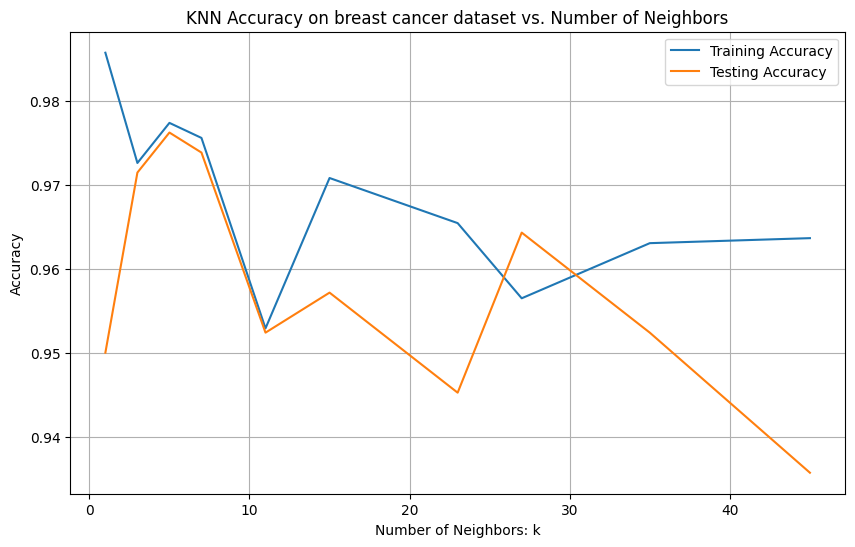

In [20]:
k_values_breast_cancer = [1, 3, 5, 7, 11, 15, 23, 27, 35, 45]
iterations = 3

print("Running KNN on breast cancer dataset")
train_acc, test_acc = KNN_on_diff_k(df=breast_cancer_df, k_values=k_values_breast_cancer, iterations=iterations, target="Class")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values_breast_cancer, train_acc, label='Training Accuracy')
plt.plot(k_values_breast_cancer, test_acc, label='Testing Accuracy')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy on breast cancer dataset vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

##### nhanes dataset
Similarly, the nhanes dataset has 6287 instances and with a 20% test split, the training set will have approximately 5029 instances (80% of 6287).

* k = 1: The smallest value

* k = 3: Another small value

* k = 5: A common default choice for KNN

* k = 15: A moderate value that captures a larger neighborhood.

* k = 31: Another moderate value.

* k = 51: A larger value, good for datasets with a lot of noise.

* k = 71: Approaching the square root of the number of training instances (square root of 5029 is approximately 70.9).

* k = 79: A value slightly above the square root heuristic.

* k = 107: A larger value to observe the effect of a wider neighborhood.

* k = 151: A relatively large value, but still less than 10% of the training data size.

Running KNN on nhanes dataset


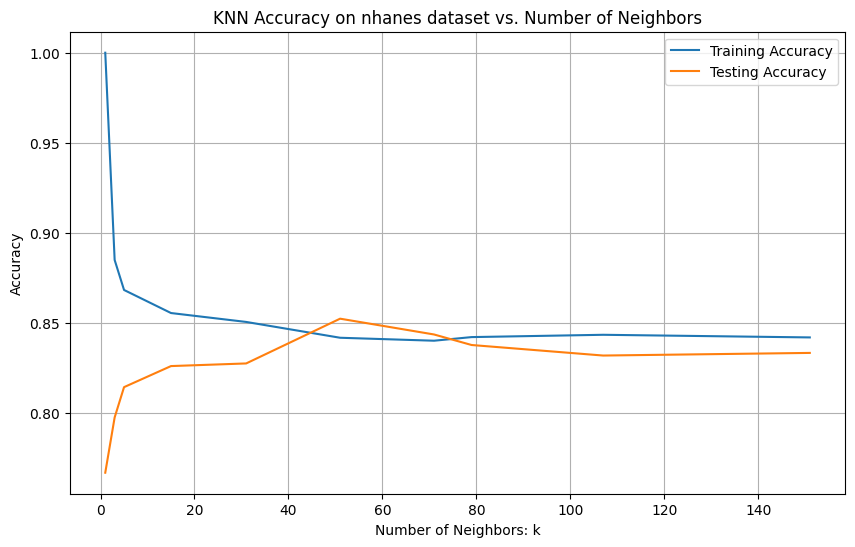

In [21]:
k_values_nhanes = [1, 3, 5, 15, 31, 51, 71, 79, 107, 151]
iterations = 3

print("Running KNN on nhanes dataset")
train_acc, test_acc = KNN_on_diff_k(df=nhanes_df, k_values=k_values_nhanes, iterations=iterations, target="age_group")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values_nhanes, train_acc, label='Training Accuracy')
plt.plot(k_values_nhanes, test_acc, label='Testing Accuracy')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy on nhanes dataset vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

#### 3.3 - Check how maximum tree depth can affect the performance of DT on the provided datasets.

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

def DTT_on_diff_depth(df, target_column, depth_values, iterations, cost_fn, min_leaf_instances):
    train_acc_results = []
    test_acc_results = []

    for max_depth in depth_values:
        avg_train_acc = 0
        avg_test_acc = 0

        for seed in random.sample(range(1, 1000), iterations):

            label_encoder = LabelEncoder()
            y = label_encoder.fit_transform(df[target_column].values)
            X = df.drop(columns=[target_column]).values

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
            num_classes = len(np.unique(y))
            tree = DecisionTree(num_classes=num_classes, max_depth=max_depth, cost_fn=cost_fn, min_leaf_instances=min_leaf_instances)
            tree.fit(X_train, y_train)

            # Evaluate the model on the training set
            predictions_train = tree.predict(X_train)
            train_acc = evaluate_acc(y_train, predictions_train)
            avg_train_acc += train_acc

            # Evaluate the model on the testing set
            predictions_test = tree.predict(X_test)
            test_acc = evaluate_acc(y_test, predictions_test)
            avg_test_acc += test_acc

        avg_train_acc /= iterations
        avg_test_acc /= iterations
        train_acc_results.append(avg_train_acc)
        test_acc_results.append(avg_test_acc)

    return train_acc_results, test_acc_results

##### Breast Cancer dataset

For the Breast cancer dataset, which has 9 features, we started from a depth of 1 and moved up to a depth where each feature can be used at least once (considering some splits might use the same feature more than once). For 9 features, a depth greater than 9 is might be excessive for a dataset of this size.

The shallower trees (lower max_depth) risk underfitting the data (too simple to capture the patterns), while deeper trees risk overfitting (too complex, capturing noise). The range from 1 to around 12 was chosen to explore this trade-off.

[Sources](https://medium.com/@ompramod9921/decision-trees-8e2391f93fa7).

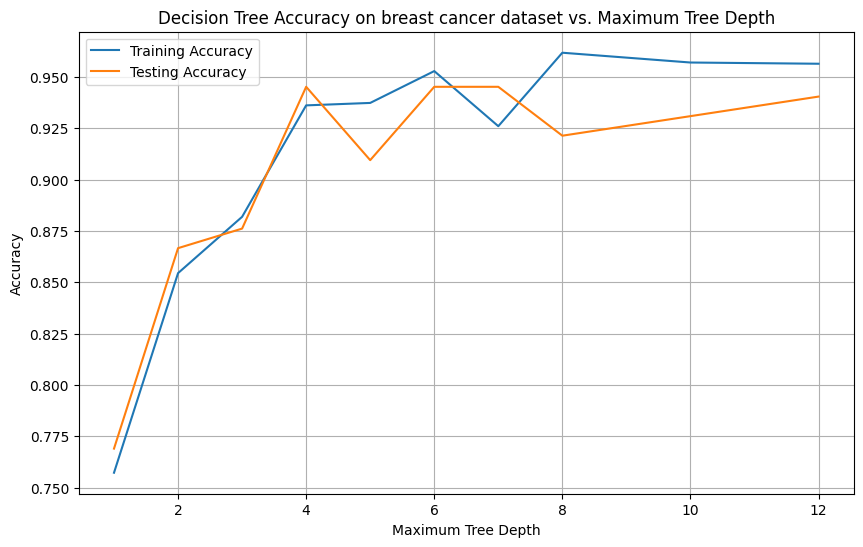

In [23]:
# Define depth_values and run the function
depth_values_breast_cancer = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12]
iterations = 3
train_acc, test_acc = DTT_on_diff_depth(df=breast_cancer_df, target_column="Class", depth_values=depth_values_breast_cancer, iterations=iterations, cost_fn=cost_misclassification, min_leaf_instances=5)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(depth_values_breast_cancer, train_acc, label='Training Accuracy')
plt.plot(depth_values_breast_cancer, test_acc, label='Testing Accuracy')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy on breast cancer dataset vs. Maximum Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

##### nhanes dataset

For the nhanes dataset, which has 7 features, we started from a depth of 1 and moved up to a depth which balences the dataset size and number of features.

Compared to the Breast cancer dataset, larger datasets can generally support deeper trees because they provide more information and are less likely to overfit at moderate depths. So for the nhanes dataset with 6287 instances, there's more flexibility to explore deeper trees compared to smaller datasets.

The more features you have, the more complex the decision boundaries become. With fewer features (7 rather than 9), extremely deep trees might start focusing on noise, leading to overfitting. In datasets with more features, deeper trees might be necessary to capture the interactions between a larger number of features.

[Sources](https://www.youtube.com/watch?v=Awymq2AJc5o&ab_channel=MachineLearningLessons).

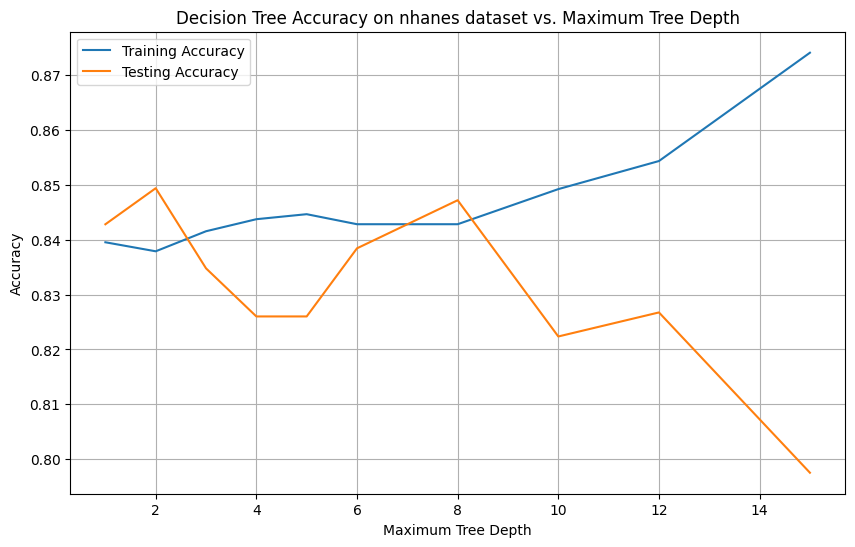

In [24]:
# Define depth_values and run the function
depth_values_nhanes = [1, 2, 3, 4, 5, 6, 8, 10, 12, 15]
iterations = 3
train_acc, test_acc = DTT_on_diff_depth(df=nhanes_df, target_column="age_group", depth_values=depth_values_nhanes, iterations=iterations, cost_fn=cost_misclassification, min_leaf_instances=5)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(depth_values_nhanes, train_acc, label='Training Accuracy')
plt.plot(depth_values_nhanes, test_acc, label='Testing Accuracy')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy on nhanes dataset vs. Maximum Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

#### 3.4 - Try out different distance/cost functions for both models.

##### Testing different distance models on KNN

In [26]:
iterations = 5

print("Breast Cancer Dataset\n")
print("Original dataset KNN with Euclidean")
# Run on original breast cancer dataset
run_KNN_on(df=breast_cancer_df, iterations=iterations, df_name="breast_cancer_df")

print("Original dataset KNN with Manhattan")
# Run on original breast cancer dataset
run_KNN_on(df=breast_cancer_df, iterations=iterations, df_name="breast_cancer_df", distance_fn=manhattan)

print("Dataset without least important feature KNN with Manhattan")

print("\nNHANES Age Prediction Dataset\n")
print("Original dataset KNN with Euclidean")
# Run on original breast cancer dataset
run_KNN_on(df=nhanes_df, target="age_group", iterations=iterations, df_name="nhanes_df")

print("Original dataset KNN with Manhattan")
# Run on original breast cancer dataset
run_KNN_on(df=nhanes_df, target="age_group", iterations=iterations, df_name="nhanes_df", distance_fn=manhattan)

Breast Cancer Dataset

Original dataset KNN with Euclidean

Average accuracy for 5 iterations: 0.9714285714285713
Average AUROC for 5 iterations: 0.5

Original dataset KNN with Manhattan

Average accuracy for 5 iterations: 0.9542857142857143
Average AUROC for 5 iterations: 0.5

Dataset without least important feature KNN with Manhattan

NHANES Age Prediction Dataset

Original dataset KNN with Euclidean

Average accuracy for 5 iterations: 0.8114035087719298
Average AUROC for 5 iterations: 0.6183020506212787

Original dataset KNN with Manhattan

Average accuracy for 5 iterations: 0.8162280701754385
Average AUROC for 5 iterations: 0.6469640741690629



##### Testing different cost models on DT

In [27]:
print("--- Cost with Misclassification Model ---\n")
print("CM on breast cancer dataset")
run_DTT()

print("CM on nhanes dataset")
run_DTT(df=nhanes_df, df_name="nhanes_df", target_column="age_group")

print("--- Cost with Entropy Model ---\n")
print("Entropy on breast cancer dataset")
run_DTT(cost_fn=cost_entropy)

print("Entropy on nhanes dataset")
run_DTT(df=nhanes_df, df_name="nhanes_df", target_column="age_group", cost_fn=cost_entropy)

print("--- Cost with Gini index Model ---\n")
print("GI on breast cancer dataset")
run_DTT(cost_fn=cost_gini_index)

print("GI on nhanes dataset")
run_DTT(df=nhanes_df, df_name="nhanes_df", target_column="age_group", cost_fn=cost_gini_index)

--- Cost with Misclassification Model ---

CM on breast cancer dataset

Average Test Accuracy: 0.9185714285714287
Average AUROC: 0.9068215424708443

CM on nhanes dataset

Average Test Accuracy: 0.8271929824561404
Average AUROC: 0.5268349806457152

--- Cost with Entropy Model ---

Entropy on breast cancer dataset

Average Test Accuracy: 0.9357142857142857
Average AUROC: 0.9351922732350092

Entropy on nhanes dataset

Average Test Accuracy: 0.8166666666666668
Average AUROC: 0.5260818633962044

--- Cost with Gini index Model ---

GI on breast cancer dataset

Average Test Accuracy: 0.9457142857142857
Average AUROC: 0.9367747944415614

GI on nhanes dataset

Average Test Accuracy: 0.8285087719298246
Average AUROC: 0.5198419952206426



#### 3.5 - Plot the ROC for KNN and DT on the test data.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import random

def get_KNN_AUROC(df, iterations, df_name, k=3, distance_fn=euclidean, target="Class"):

  seed = random.randint(1, 1000)

  # Split the data into training and testing sets randomly
  train_df, test_df = train_test_split(df, test_size=0.2, random_state=seed)

  # Separate features (X) and target labels (y) for training set
  X_train = train_df.drop(columns=[target])
  y_train = train_df[[target]]

  # Separate features (X) and target labels (y) for testing set
  X_test = test_df.drop(columns=[target])
  y_test = test_df[[target]]

  # Initialize and fit the KNN model
  knn_model = KNN(k=3, distance_fn=distance_fn)
  knn_model.fit(X_train.values, y_train.values.flatten())

  # Make predictions on the test set
  y_pred_prob, _ = knn_model.predict(X_test.values)

  ###############
  #### AUROC ####
  ###############

  y_test_AUROC = y_test.values.flatten()

  # Map original labels to binary format
  # Map '2' to '0' (negative class) and '4' to '1' (positive class)
  if df_name == "breast_cancer_df":
    y_test_AUROC = np.where(y_test.values.flatten() == 2, 0, 1)

  # Extract probabilities for the positive class
  y_pred_prob_positive = y_pred_prob[:, 1]

  # Calculate ROC curve
  # y_test_AUROC: actual binary labels (0 or 1)
  # y_pred_prob_positive: predicted probabilities for the positive class (class label 1)
  fpr, tpr, thresholds = roc_curve(y_test_AUROC, y_pred_prob_positive)

  # Calculate AUROC by integrating TPR over FPR
  # This integration can be approximated by calculating the area under the curve using the trapezoidal rule
  return fpr, tpr, np.trapz(tpr, fpr)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
import random

def get_DT_AUROC(df=breast_cancer_df, target_column="Class", iterations=5, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=5):

  seed = random.randint(1, 1000)

  # If the target variable is categorical, encode it to integers
  label_encoder = LabelEncoder()
  y = label_encoder.fit_transform(df[target_column].values)
  X = df.drop(columns=[target_column]).values

  # Split the data - 80% training, 20% testing
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

  # Initialize the Decision Tree with the number of unique classes in y
  num_classes = len(np.unique(y))
  tree = DecisionTree(num_classes=num_classes, max_depth=10, cost_fn=cost_misclassification, min_leaf_instances=min_leaf_instances)

  # Fit the tree with your training data
  tree.fit(X_train, y_train)

  # Evaluate the model on the testing set
  predictions = tree.predict(X_test)

  # Calculate ROC curve
  # y_test: actual binary labels (0 or 1)
  # predictions: predicted probabilities for the positive class
  fpr, tpr, thresholds = roc_curve(y_test, predictions)

  # Calculate AUROC by integrating TPR over FPR
  # This integration can be approximated by calculating the area under the curve using the trapezoidal rule
  return fpr, tpr, np.trapz(tpr, fpr)

##### Breast Cancer ROC

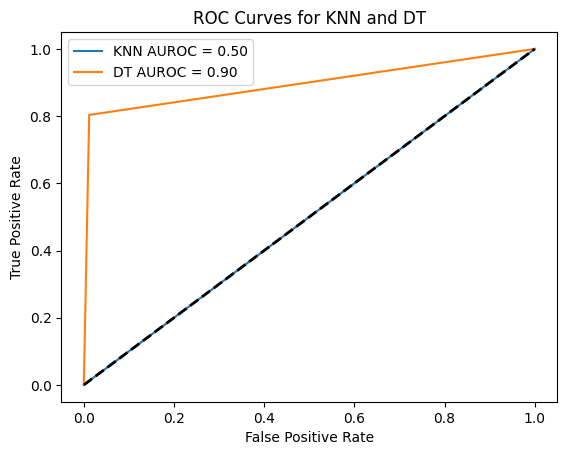

In [30]:
fpr_knn_bc, tpr_knn_bc, auroc_knn_bc = get_KNN_AUROC(df=breast_cancer_df, iterations=5, df_name="breast_cancer_df")

fpr_dt_bc, tpr_dt_bc, auroc_dt_bc = get_DT_AUROC()

# Plot ROC curves
plt.figure()
plt.plot(fpr_knn_bc, tpr_knn_bc, label=f'KNN AUROC = {auroc_knn_bc:.2f}')
plt.plot(fpr_dt_bc, tpr_dt_bc, label=f'DT AUROC = {auroc_dt_bc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for KNN and DT')
plt.legend(loc="best")
plt.show()

##### nhanes ROC

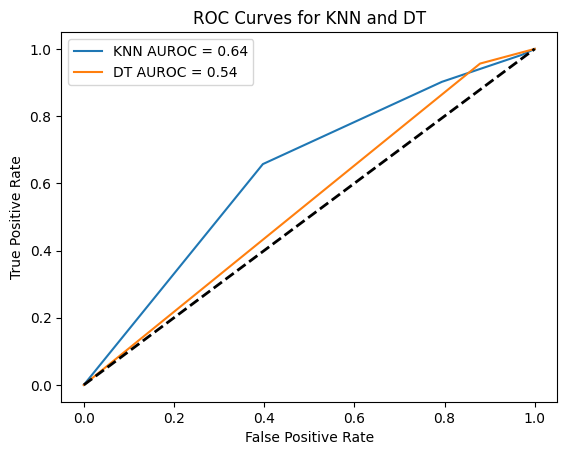

In [31]:
fpr_knn_nhanes, tpr_knn_nhanes, auroc_knn_nhanes = get_KNN_AUROC(df=nhanes_df, iterations=5, df_name="nhanes_df", target="age_group")

fpr_dt_nhanes, tpr_dt_nhanes, auroc_dt_nhanes = get_DT_AUROC(df=nhanes_df, target_column="age_group")

plt.figure()
plt.plot(fpr_knn_nhanes, tpr_knn_nhanes, label=f'KNN AUROC = {auroc_knn_nhanes:.2f}')
plt.plot(fpr_dt_nhanes, tpr_dt_nhanes, label=f'DT AUROC = {auroc_dt_nhanes:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for KNN and DT')
plt.legend(loc="best")
plt.show()

#### 3.6 - Describe how you obtain the key features used in KNN (e.g., external feature selection by correlation with the labels).

In [32]:
"""
This was run with 10 iterations to determine which subset of NHANES performs the best under KNN.
The following results were achieved.

Average accuracy for 10 iterations: 0.8142543859649123
Average AUROC for 10 iterations: 0.6389074070001731

Dropping 1 least important feature: RIAGENDR. NHANES dataset is now of size (2278, 8)

Average accuracy for 10 iterations: 0.813815789473684
Average AUROC for 10 iterations: 0.6374112800702385

Dropping 2 least important feature: BMXBMI. NHANES dataset is now of size (2278, 7)

Average accuracy for 10 iterations: 0.8107456140350877
Average AUROC for 10 iterations: 0.6469888054170372

Dropping 3 least important feature: DIQ010. NHANES dataset is now of size (2278, 6)

Average accuracy for 10 iterations: 0.8153508771929824
Average AUROC for 10 iterations: 0.6391804524652739

Dropping 4 least important feature: LBXIN. NHANES dataset is now of size (2278, 5)

Average accuracy for 10 iterations: 0.7929824561403509
Average AUROC for 10 iterations: 0.6073696302628491

Dropping 5 least important feature: PAQ605. NHANES dataset is now of size (2278, 4)

Average accuracy for 10 iterations: 0.8054824561403506
Average AUROC for 10 iterations: 0.6135375750313538
"""
iterations = 5

print("\nNHANES Age Prediction Dataset - original\n")
# Run on original breast cancer dataset
run_KNN_on(df=nhanes_df, target="age_group", iterations=iterations, df_name="nhanes_df")
"""
From the calc_statistics function, we know that NHANES' least important features are:
RIAGENDR    0.002767
PAQ605      0.094789
BMXBMI      0.004147
DIQ010      0.026399
LBXIN       0.064159
"""
refined_nhanes_df = nhanes_df.copy()
for idx, feature in enumerate(nhanes_df_least_important_features.index):
  print("Dropping " + str(idx+1) + " least important feature: " + str(feature) + ". NHANES dataset is now of size " + str(refined_nhanes_df.shape))
  refined_nhanes_df = refined_nhanes_df.drop(columns=[feature])
  run_KNN_on(df=refined_nhanes_df, target="age_group", iterations=iterations, df_name="nhanes_df")


NHANES Age Prediction Dataset - original


Average accuracy for 5 iterations: 0.8043859649122806
Average AUROC for 5 iterations: 0.6456793477884469

Dropping 1 least important feature: RIAGENDR. NHANES dataset is now of size (2278, 8)

Average accuracy for 5 iterations: 0.8004385964912281
Average AUROC for 5 iterations: 0.650340440193935

Dropping 2 least important feature: BMXBMI. NHANES dataset is now of size (2278, 7)

Average accuracy for 5 iterations: 0.825
Average AUROC for 5 iterations: 0.663703154635428

Dropping 3 least important feature: DIQ010. NHANES dataset is now of size (2278, 6)

Average accuracy for 5 iterations: 0.8206140350877194
Average AUROC for 5 iterations: 0.6642861454851517

Dropping 4 least important feature: LBXIN. NHANES dataset is now of size (2278, 5)

Average accuracy for 5 iterations: 0.7982456140350876
Average AUROC for 5 iterations: 0.6045382652701659

Dropping 5 least important feature: PAQ605. NHANES dataset is now of size (2278, 4)

Average accurac

#### 3.7 - Compute a rough feature importance score for each feature d by counting the number of non-leaf nodes where feature d is used.

#### For NHANES dataset

In [33]:
import numpy as np

X = nhanes_df.drop(columns=['age_group']).values
y = nhanes_df['age_group'].values

num_classes = len(np.unique(y))  # Determine the number of unique classes in the target
cost_fn = cost_misclassification
min_leaf_instances = 5

In [34]:
tree = DecisionTree(num_classes=num_classes, max_depth=10, cost_fn=cost_fn, min_leaf_instances=min_leaf_instances)
tree.fit(X, y)

In [35]:
# Sort features by their usage count and get the top 5
sorted_features = sorted(tree.feature_importance_count.items(), key=lambda item: item[1], reverse=True)[:5]

print("Top 5 most used features in non-leaf nodes:")
for feature, count in sorted_features:
    print(f"Feature {feature} used {count} times")

Top 5 most used features in non-leaf nodes:
Feature 2 used 58 times
Feature 3 used 31 times
Feature 5 used 24 times
Feature 6 used 24 times
Feature 0 used 15 times


#### For Breast cancer dataset

In [36]:
import numpy as np

feature_columns = [col for col in breast_cancer_df.columns if col != 'Class']
X = breast_cancer_df[feature_columns].values
y = breast_cancer_df['Class'].values

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

num_classes = len(np.unique(y))  # Determine the number of unique classes in the target
cost_fn = cost_misclassification
min_leaf_instances = 5

# Initialize and fit the Decision Tree
tree = DecisionTree(num_classes=num_classes, max_depth=10, cost_fn=cost_fn, min_leaf_instances=min_leaf_instances)
tree.fit(X, y)

# Sort features by their usage count and get the top 5
sorted_features = sorted(tree.feature_importance_count.items(), key=lambda item: item[1], reverse=True)[:5]

print("Top 5 most used features in non-leaf nodes for the breast cancer dataset:")

for feature, count in sorted_features:
    feature_name = feature_columns[feature]  # Map feature index back to feature name
    print(f"{feature_name} used {count} times")


Top 5 most used features in non-leaf nodes for the breast cancer dataset:
Clump_thickness used 12 times
Marginal_adhesion used 7 times
Uniformity_of_cell_size used 5 times
Uniformity_of_cell_shape used 5 times
Bare_nuclei used 4 times


#### 3.8 Model Selection using a Validation Set
Split the data into training, validation and testing and use the validation set to select the best K and the best tree depth and evaluate the best choice on the test set.

1. Split the data into training, validation, and testing
sets.
2. Define a range of values for k (KNN) and tree depth (DT).
3. Train KNN and DT models on the training set using different k and depth values.
4. Evaluate each model on the validation set and choose the best k and depth based on performance.
5. Retrain models with the best parameters on the combined training and validation set.
6. Evaluate these models on the test set.

##### Breast Cancer

In [49]:
from sklearn.model_selection import train_test_split

target = "Class"
seed = random.randint(1, 1000)

# First, split into 60% train and 40% remaining
train_df, remaining_df = train_test_split(breast_cancer_df, test_size=0.4, random_state=seed)

# Separate features (X) and target labels (y)
X_train, y_train = train_df.drop(columns=[target]), train_df[[target]]
X_remaining, y_remaining = remaining_df.drop(columns=[target]), remaining_df[[target]]

# Then split the remaining 40% into half validation and half test
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=seed)

# Define Range of Values, from part 3.2
k_values = [1, 3, 5, 7, 11, 15, 23, 27, 35, 45]

# Train KNN and DT models on the training set using different k and depth values,
# Then evaluate KNN and DT on the validation set and choose the best k and depth value based on performance.
best_k = None
best_accuracy = 0

for k in k_values:

  knn_model = KNN(k=k, distance_fn=euclidean)
  knn_model.fit(X_train.values, y_train.values.flatten())
  y_pred_prob, _ = knn_model.predict(X_val.values)
  y_pred_val = np.argmax(y_pred_prob, axis=1)
  accuracy = evaluate_acc(y_pred_val, y_val.values.flatten())

  if accuracy > best_accuracy:

    best_accuracy = accuracy
    best_k = k

# Retrain models with the best parameters on the combined training and validation set.

# Combine training and validation sets
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

# Retrain KNN
knn_model = KNN(k=best_k, distance_fn=euclidean)
knn_model.fit(X_train_full.values, y_train_full.values.flatten())

# Evaluate these models on the test set.

# Evaluate KNN
y_pred_knn = np.argmax(knn_model.predict(X_test.values)[0], axis=1)
knn_test_accuracy = evaluate_acc(y_pred_knn, y_test.values.flatten())

print("KNN Test Accuracy with k= " + str(best_k) + ": " + str(knn_test_accuracy))


KNN Test Accuracy with k= 3: 0.9642857142857143
